In [1]:
## Risk och reserv
library(MASS)
library(psych)

In [2]:
claims <- read.table("Projekt1_Grupp8.txt", header = TRUE, sep = ";")
summary(claims)
head(claims, n=4)

   ClaimType        ClaimDay        ClaimCost      
 Min.   :1.000   Min.   :   1.0   Min.   :     73  
 1st Qu.:1.000   1st Qu.: 957.5   1st Qu.:  17226  
 Median :1.000   Median :1839.0   Median :  29551  
 Mean   :1.381   Mean   :1836.3   Mean   :  54326  
 3rd Qu.:2.000   3rd Qu.:2772.5   3rd Qu.:  56466  
 Max.   :2.000   Max.   :3650.0   Max.   :6059663  

ClaimType,ClaimDay,ClaimCost
1,1,21176
1,1,4221
1,1,35221
1,1,41324


In [3]:
# Olika värdedagar claim1 ? claim2 = inner join
CommonDays<-intersect(claims$ClaimDay[claims$ClaimType==1],
                      claims$ClaimDay[claims$ClaimType==2])

In [4]:
arrivals.daily <- aggregate(list(Arrivals=claims$ClaimDay),
                            list(ClaimDay=claims$ClaimDay, ClaimType=claims$ClaimType),
                            length)
cost.daily <- aggregate(list(Cost=claims$ClaimCost),
                        list(ClaimDay=claims$ClaimDay, ClaimType=claims$ClaimType), sum)

In [5]:
claims.daily<-merge(arrivals.daily,cost.daily)

claims.365<-subset(claims, select=c("ClaimType","ClaimDay"))
# Label to days in 1 Y 1-365
claims.365$ClaimDay365 <- claims.365$ClaimDay %% 365
claims.365$ClaimDay365[claims.365$ClaimDay365==0] <- 365

claims.daily$MeanCost<-claims.daily$Cost/claims.daily$Arrivals

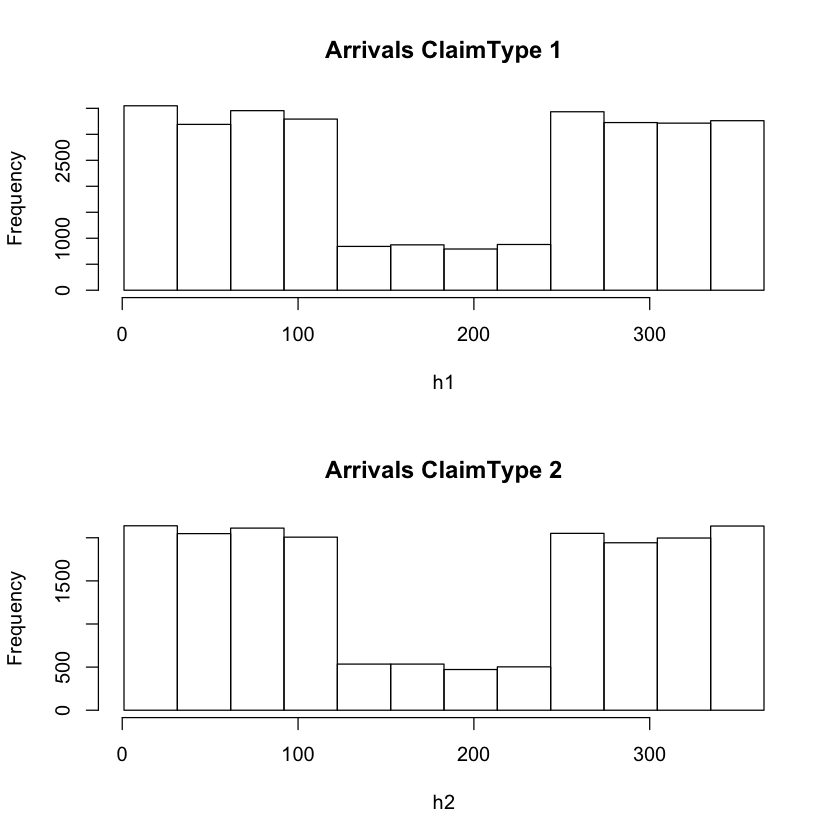

In [6]:
## ARRIVALS

# Histogram 1Y dividided by 12 months
par(mfrow=c(2,1))
h1 <- claims.365$ClaimDay365[claims.365$ClaimType==1]
b1 <- seq(min(h1), max(h1), length.out = 13)
hist(h1, breaks=b1,main="Arrivals ClaimType 1")
h2 <- claims.365$ClaimDay365[claims.365$ClaimType==2]
b2 <- seq(min(h2), max(h2), length.out = 13)
hist(h2, breaks=b2,main="Arrivals ClaimType 2")

In [7]:
# From hist, less arrivals June-August
# Label to days in 1 Y 1-365
claims.daily$ClaimDay365 <- claims.daily$ClaimDay %% 365
claims.daily$ClaimDay365[claims.daily$ClaimDay365==0] <- 365

claims.daily$Summer <- 0
claims.daily$Summer[b1[5]<claims.daily$ClaimDay365&claims.daily$ClaimDay365<=b1[9]] <-1

# Branch 1
lambda1s<-fitdistr(claims.daily$Arrivals[claims.daily$ClaimType==1 &
                   claims.daily$Summer==1], "Poisson")$estimate
lambda1w<-fitdistr(claims.daily$Arrivals[claims.daily$ClaimType==1 &
                   claims.daily$Summer==0], "Poisson")$estimate
# Branch 2
lambda2s<-fitdistr(claims.daily$Arrivals[claims.daily$ClaimType==2 &
                   claims.daily$Summer==1], "Poisson")$estimate
lambda2w<-fitdistr(claims.daily$Arrivals[claims.daily$ClaimType==2 &
                   claims.daily$Summer==0],"Poisson")$estimate

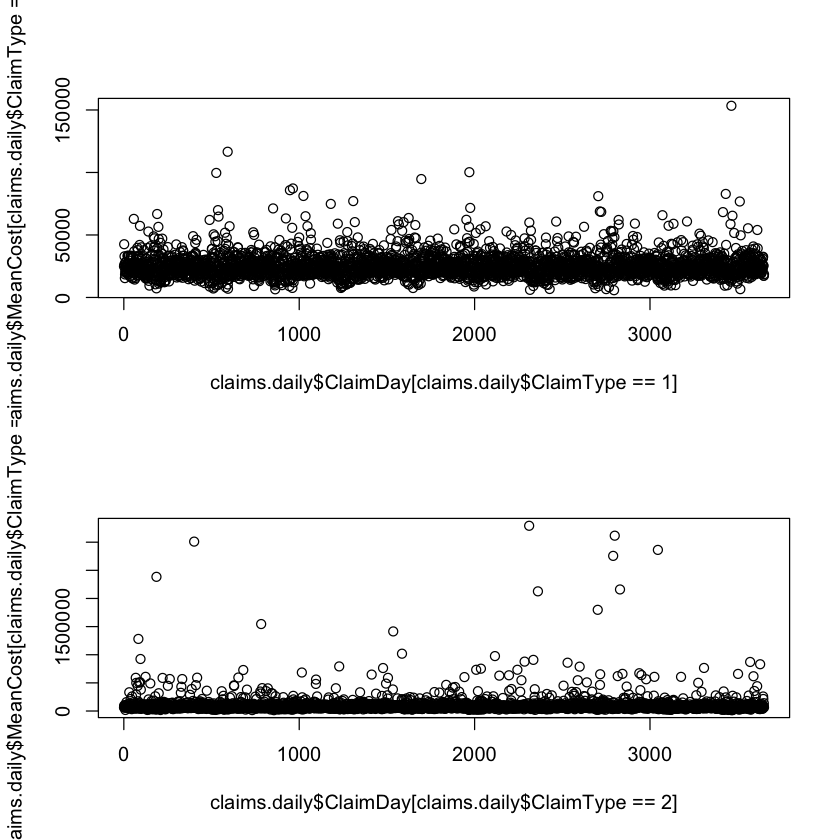

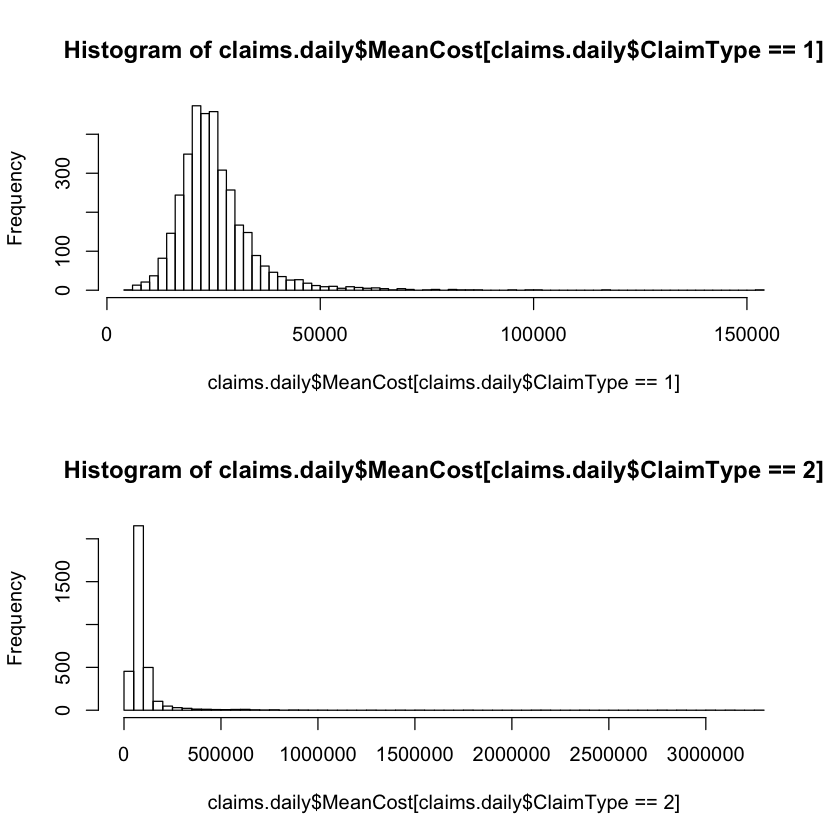

In [8]:
### COST
par(mfrow=c(2,1))
plot(claims.daily$ClaimDay[claims.daily$ClaimType==1],
     claims.daily$MeanCost[claims.daily$ClaimType==1])
plot(claims.daily$ClaimDay[claims.daily$ClaimType==2],
     claims.daily$MeanCost[claims.daily$ClaimType==2])

par(mfrow=c(2,1))
hist(claims.daily$MeanCost[claims.daily$ClaimType==1],100)
hist(claims.daily$MeanCost[claims.daily$ClaimType==2],100)

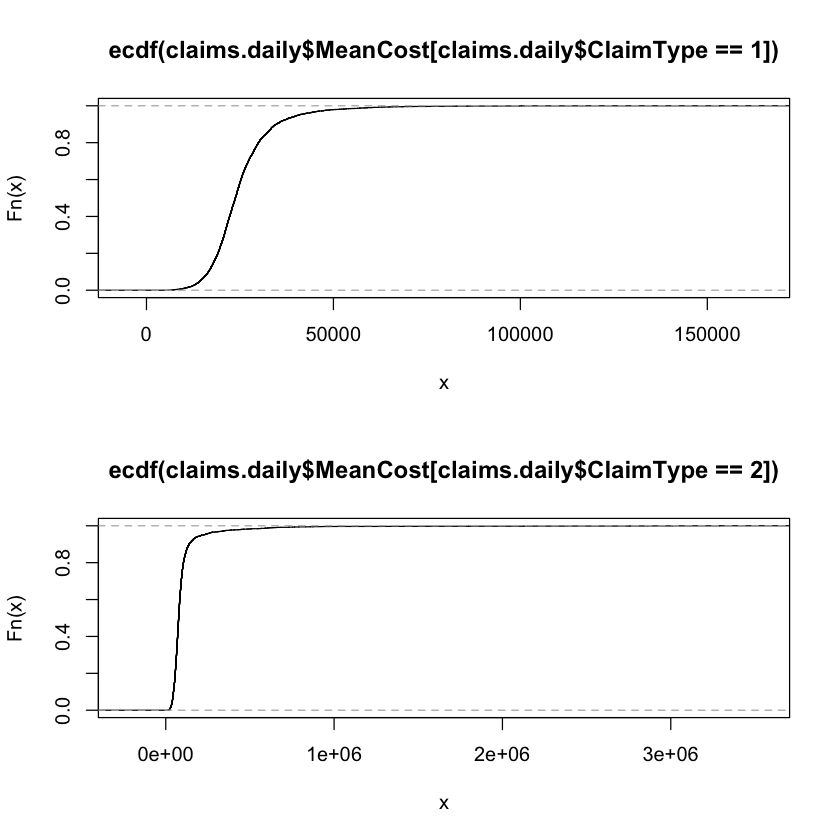

In [9]:
# Empirisk fördelningsfunktion
par(mfrow=c(2,1))
plot(ecdf(claims.daily$MeanCost[claims.daily$ClaimType==1]))
plot(ecdf(claims.daily$MeanCost[claims.daily$ClaimType==2]))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5794   19974   23780   25266   28604  153358 

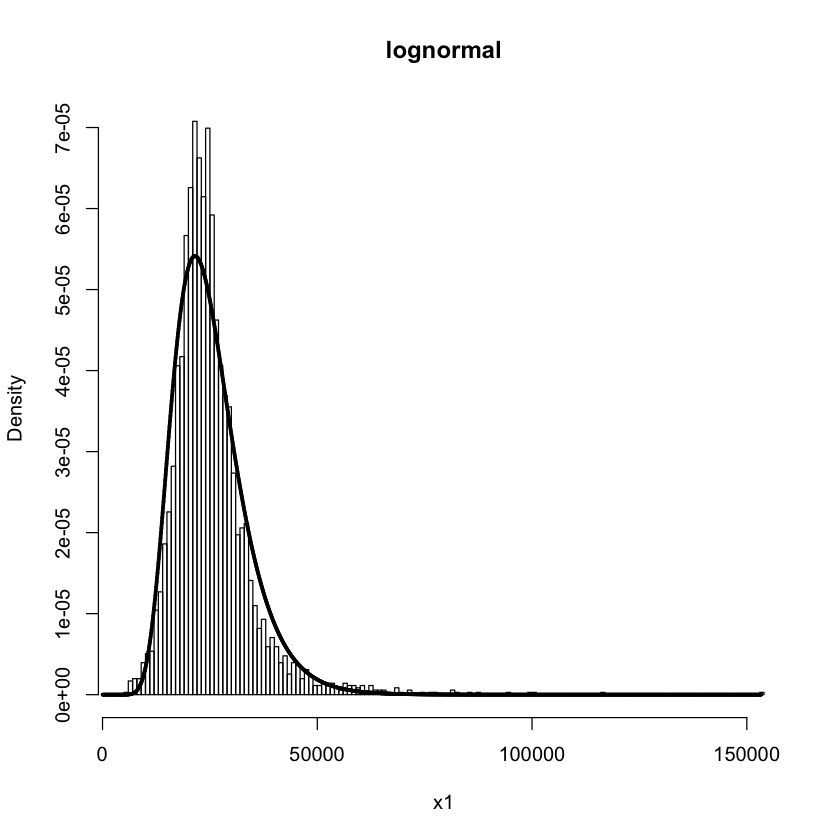

In [10]:
# Claims 1
summary(claims.daily$MeanCost[claims.daily$ClaimType==1])
x1<-claims.daily$MeanCost[claims.daily$ClaimType==1]
hist(x1,200,freq=F,main="lognormal")
fit1<-fitdistr(x1,"lognormal")$estimate
lines(dlnorm(0:max(x1),fit1[1],fit1[2]),lwd=3)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14152   60129   76508  103464   97666 3291570 

Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in sqrt(diag(vc)):
“NaNs produced”

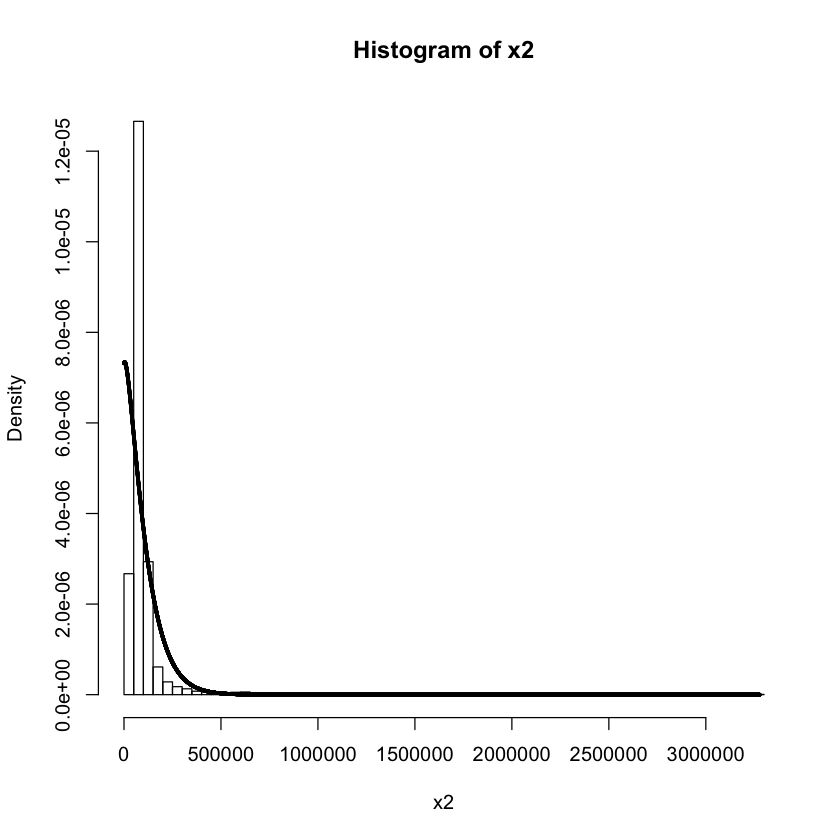

In [11]:
# Claims 2
summary(claims.daily$MeanCost[claims.daily$ClaimType==2])
x2<-claims.daily$MeanCost[claims.daily$ClaimType==2]
hist(x2,100,freq=F)
fit2<-fitdistr(x2,"weibull")$estimate
#fit2<-fitdistr(x,"weibull",list(shape = 10000, scale = 10), lower = 50)$estimate
lines(dweibull(min(x2):max(x2),fit2[1],fit2[2]),lwd=3)

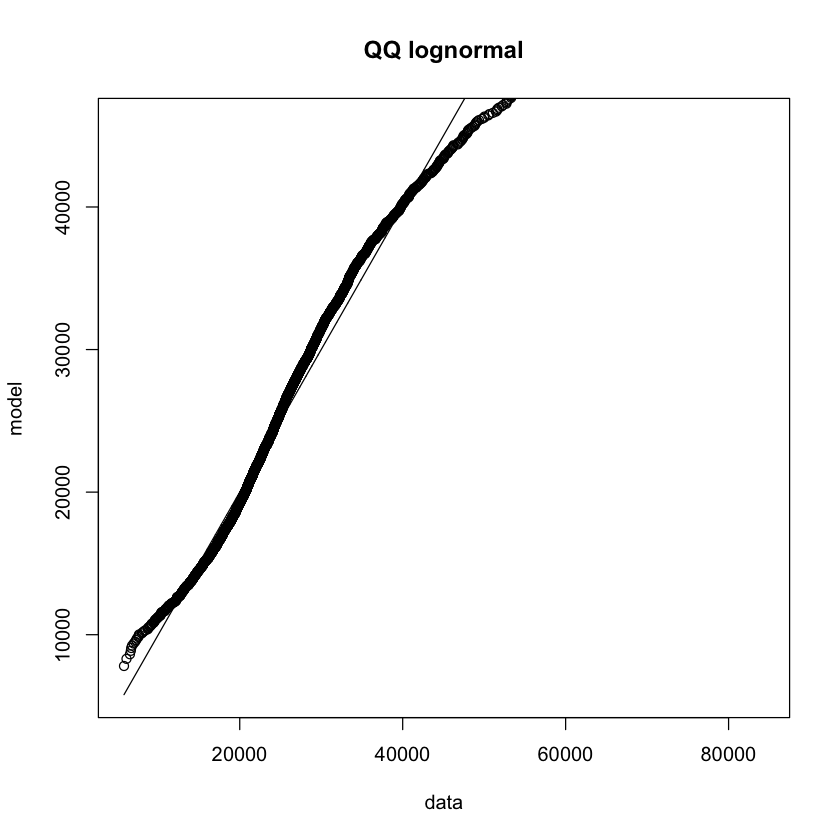

In [12]:
## Q-Q check
n1 <- length(x1)
x1.sorted <- sort(x1,dec=FALSE)
plot(x1.sorted,qlnorm((1:n1)/(n1+1),fit1[1],fit1[2]),
     xlim=c(min(x1),max(x1)*0.55), ylim=c(min(x1),max(x1)*0.3),
     xlab="data",ylab="model",main="QQ lognormal")
lines(x1.sorted,x1.sorted)

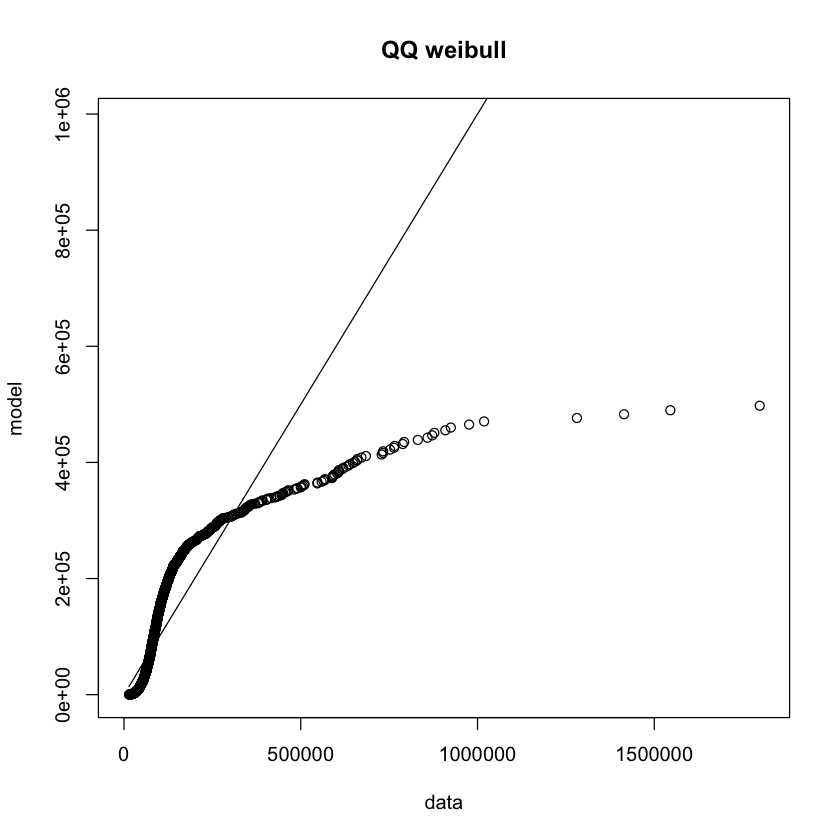

In [13]:
n2 <- length(x2)
x2.sorted <- sort(x2,dec=FALSE)#asp=1
plot(x2.sorted,qweibull((1:n2)/(n2+1),fit2[1],fit2[2]),
     xlim=c(0,max(x2)*0.55), ylim=c(0,max(x2)*0.3),
     xlab="data",ylab="model",main="QQ weibull")
lines(x2.sorted,x2.sorted)

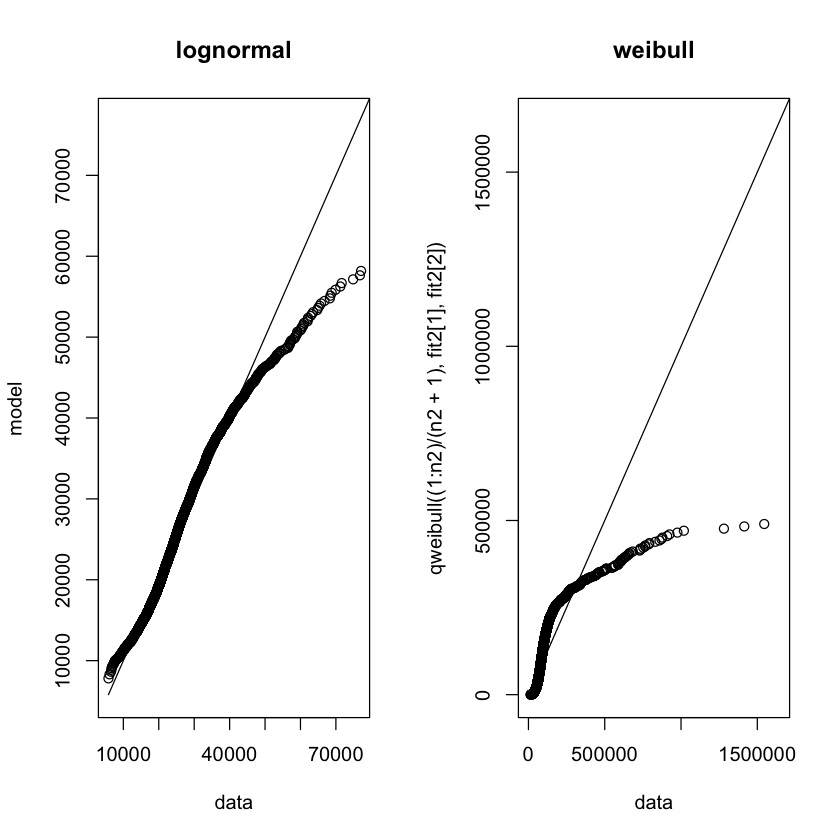

In [14]:
par(mfrow=c(1,2))
plot(x1.sorted,qlnorm((1:n1)/(n1+1),fit1[1],fit1[2]),
     xlim=c(min(x1),max(x1)*0.5), ylim=c(min(x1),max(x1)*0.5),
     xlab="data",ylab="model",main="lognormal")
lines(x1.sorted,x1.sorted)
plot(x2.sorted,qweibull((1:n2)/(n2+1),fit2[1],fit2[2]),
     xlim=c(0,max(x2)*0.5), ylim=c(0,max(x2)*0.5),
     xlab="data",main="weibull")
lines(x2.sorted,x2.sorted)

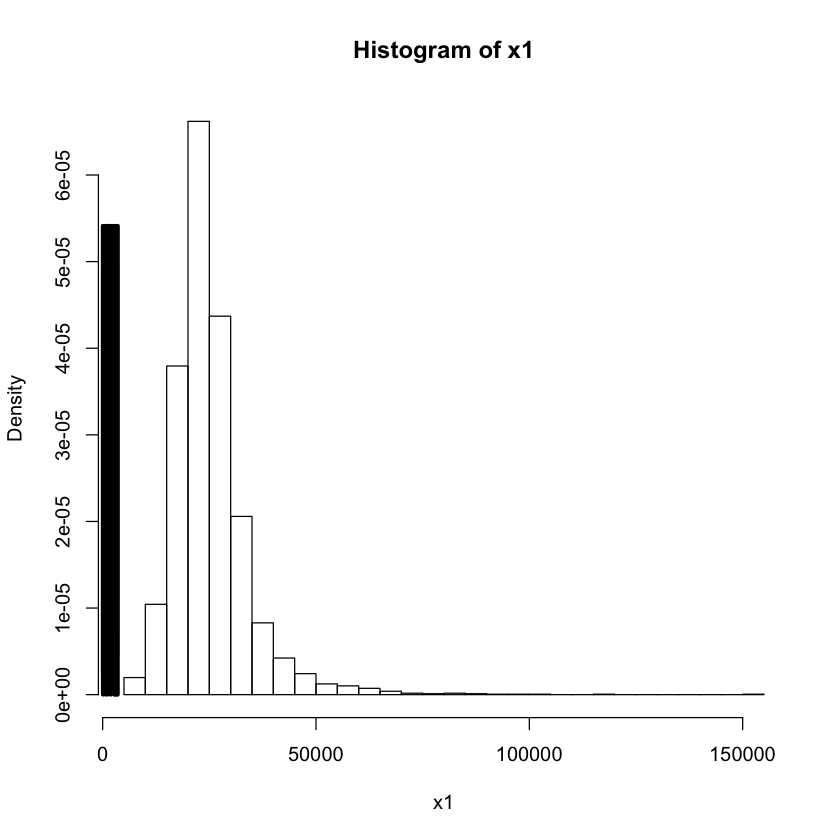

In [15]:
# Claims 1 tail detail
n1 <- length(x1)
x1.sorted <- sort(x1,dec=TRUE)
x1.tail <- x1.sorted[3000 < x1.sorted & x1.sorted < 100000]
hist(x1,50,freq=F)
lines(dlnorm(x1,fit1[1],fit1[2]),lwd=3)

In [16]:
### Compound
months<-c(31,28,31,30,31,30,31,31,30,31,30,31)
summer<-sum(months[5:8])
winter<-sum(months[1:4])+sum(months[9:12])
runs<-10000
S<-matrix(0,runs,2)
for (k in 1:runs)
{
  # Branch 1 lognormal claims
  N1w<-sum(rpois(lambda1w,winter))
  N1s<-sum(rpois(lambda1s,summer))
  N1<-N1w+N1s
  Y1<-rlnorm(N1,fit1[1],fit1[2])
  S[k,1]<-sum(Y1)
  
  # Branch 2 Weibull claims
  N2w<-sum(rpois(lambda2w,winter))
  N2s<-sum(rpois(lambda2s,summer))
  N2<-N2w+N2s
  Y2<-rweibull(N2,fit2[1],fit2[2])
  S[k,2]<-sum(Y2)
}

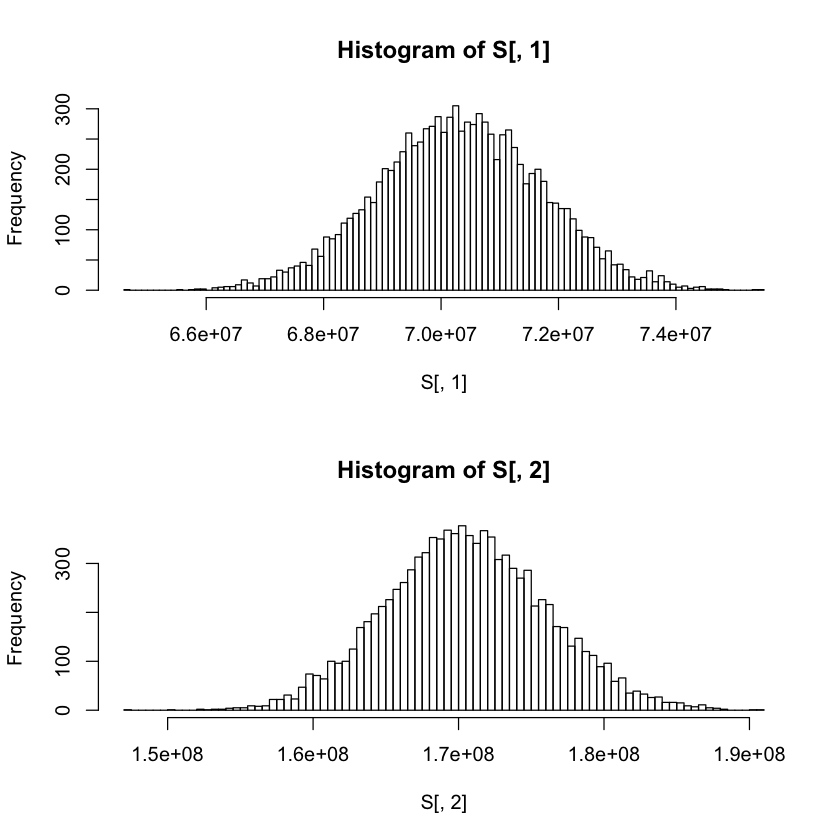

In [17]:
par(mfrow=c(2,1))
hist(S[,1],100)
hist(S[,2],100)

[1] 0.0002391869

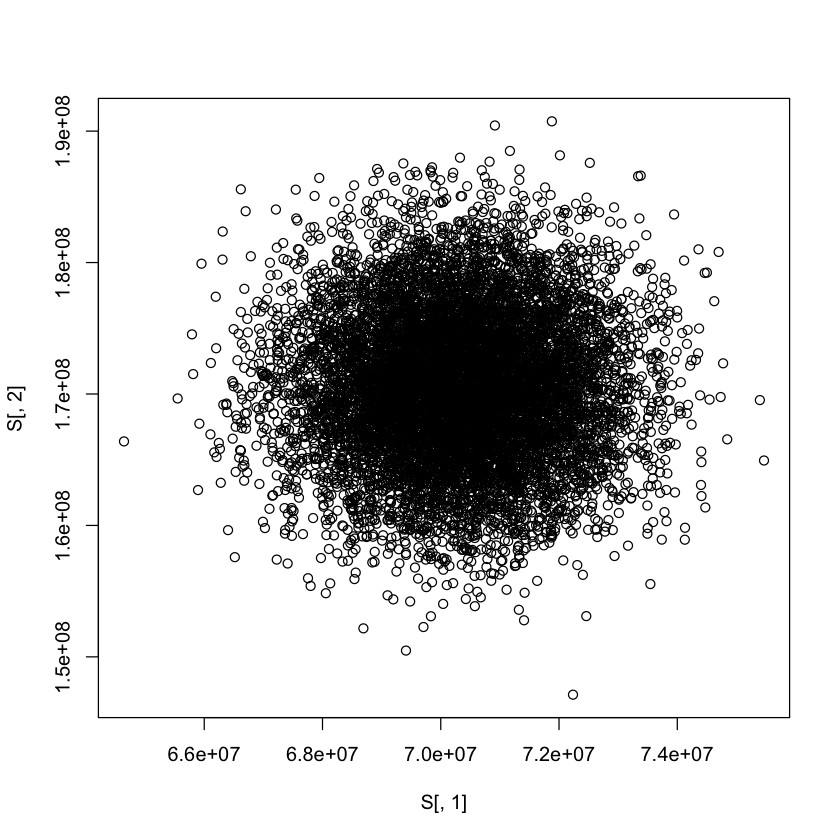

In [18]:
plot(S[,1],S[,2])
cor(S[,1],S[,2])

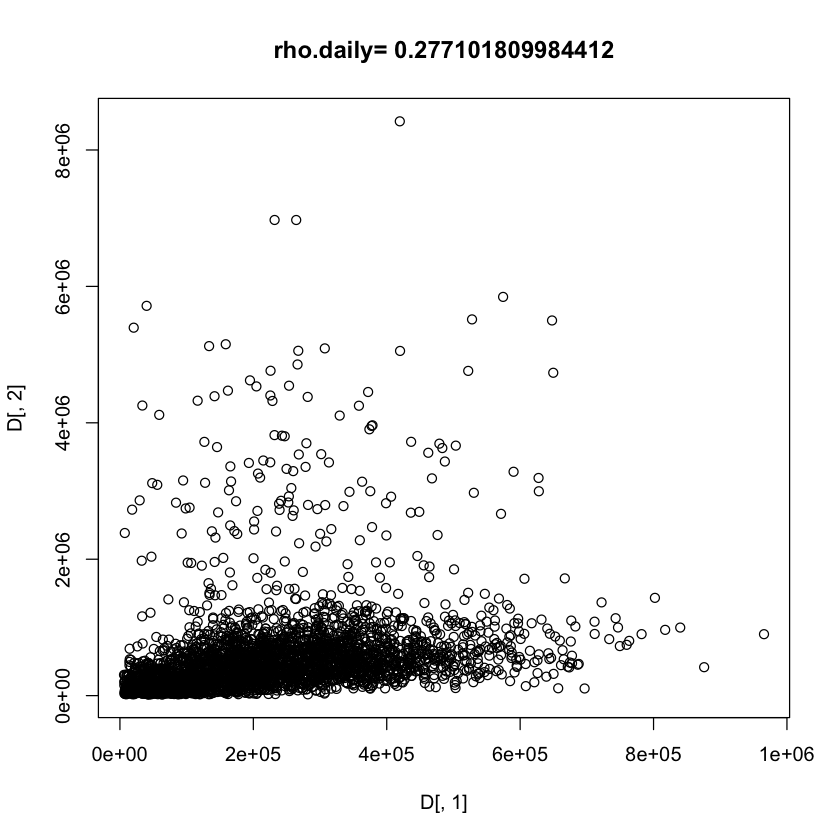

In [19]:
#Kontroll korrelation
D <- matrix(0,length(CommonDays),2)
for (k in 1:length(CommonDays))
{
  D[k,1]<-cost.daily$Cost[cost.daily$ClaimDay==CommonDays[k] &
                               cost.daily$ClaimType==1]
  D[k,2]<-cost.daily$Cost[cost.daily$ClaimDay==CommonDays[k] &
                               cost.daily$ClaimType==2]
}
rho.daily<-cor(D[,1],D[,2]) #= 0.2771018
plot(D[,1],D[,2],main=paste("rho.daily=",rho.daily))

In [20]:
# Yearly claim cost
claims.yearly <- claims
claims.yearly$ClaimYear <- (claims.yearly$ClaimDay %/% 366) + 1

cost.yearly <- aggregate(list(ClaimCost=claims.yearly$ClaimCost),
                         list(ClaimYear=claims.yearly$ClaimYear,
                              ClaimType=claims.yearly$ClaimType),
                         sum)

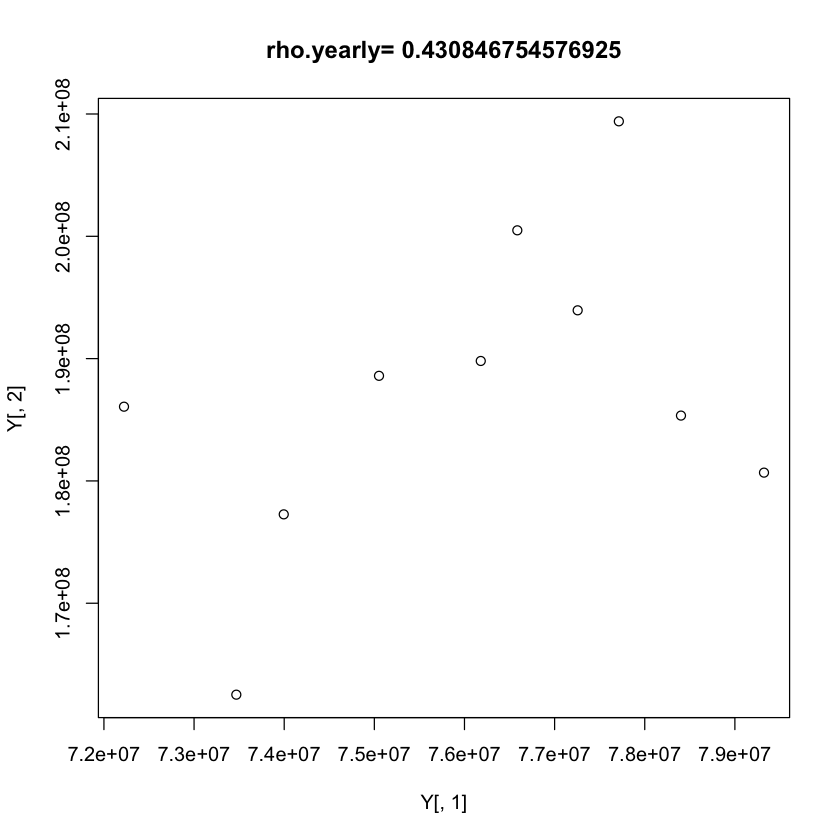

In [21]:
Y <- matrix(0,10,2)
for (k in 1:10)
{
  Y[k,1] <- cost.yearly$ClaimCost[cost.yearly$ClaimYear==k & cost.yearly$ClaimType==1]
  Y[k,2] <- cost.yearly$ClaimCost[cost.yearly$ClaimYear==k & cost.yearly$ClaimType==2]
}
rho.yearly<-cor(Y[,1],Y[,2]) #= 0.4308468
plot(Y[,1],Y[,2],main=paste("rho.yearly=",rho.yearly))

In [22]:
### Copulas

# Simulations of cost after 1 Y
# S1 Poisson/lognormal
# S2 Poisson/Weibull
#load("S.RData")
head(S,n=4)

70491248,172527300
69714215,171456308
70449730,166692616
70890210,172576483


In [23]:
n <- 100000
#rho<-0.5
# Create bivariate N[0,1]xN[0,1] w correlation rho
sigma <- matrix(c(1.0,  rho.yearly,
                  rho.yearly,  1.0), nrow=2)
x <- mvrnorm(n, mu=rep(0, 2), Sigma=sigma, empirical=TRUE)

In [24]:
# Transform to U[0,1]xU[0,1] u=F(x)
u <- pnorm(x)

In [25]:
# Inverse of empirical cdf from sampled marginaldistribution 
S1<-quantile(S[,1],u[,1],type=4)
S2<-quantile(S[,2],u[,2],type=4)

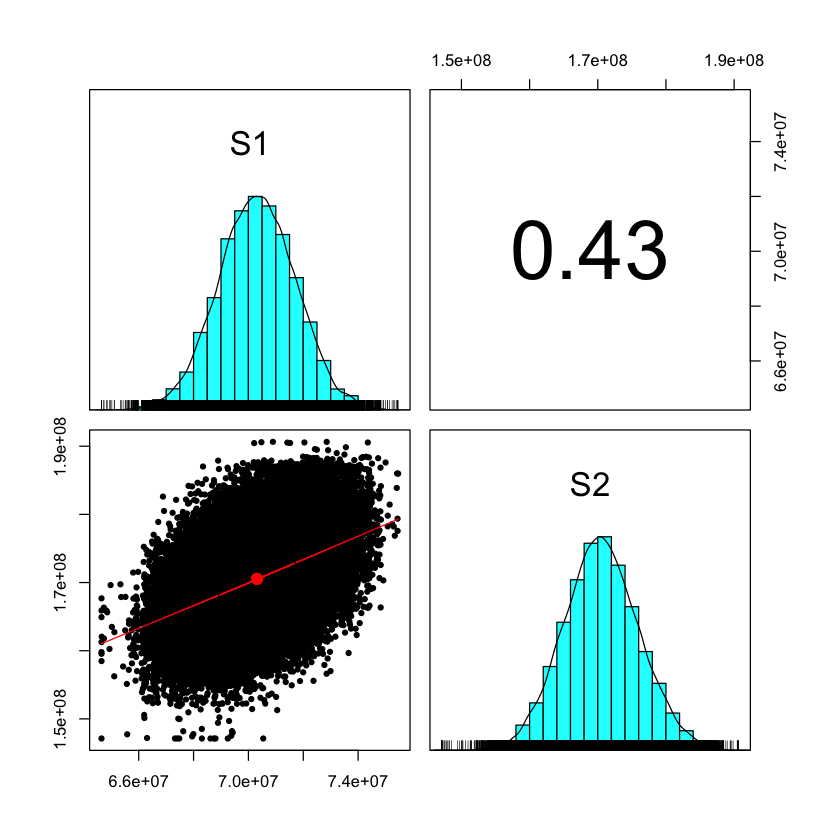

In [26]:
z<-cbind(S1,S2)
pairs.panels(z)